# PART A : DATA CLEANING 

## 0. Loading the data

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *
from processing import *

%load_ext autoreload
%autoreload 2

In [2]:
# Adjust the path to where your data is stored
data_path = 'data/dataset_to_release/'

# Load the data
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path)

In [3]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (328135, 321)
y_train shape: (328135,)
x_test shape: (109379, 321)


- There are 321 features.
- `x_train` contains the training data and it has 328 135 data entries (before cleaning).
- `x_test` contains the test data and it has 109 379 data entires (before cleaning).
- The `y` vector corresponds to the true values of the output (the variable we wish to predict). The output describes whether a person is diagnosed with MICHD or not. It is binary, -1 or +1, where -1 means no MICHD and +1 means MICHD. There are 328 135 data points (before cleaning).
- `train_ids` and `test_ids` are numpy arrays. Their values correspond to the ids of the data entries of train data and test data, respectively. Therefore, the length of `train_ids` and `test_ids` correspond to the number of data entries for both train and test data, respectively.

## 1. Getting rid of non-necessary features (manual way)

### Reducing the features by manually removing unnecessary features

To figure out which features are unimportant, we take a look at the column names of the dataset.

After taking a closer look at the features, we decide to remove the columns as done below. They were removed for either of these reasons:
- The columns were not relevant to the goal of our project (e.g. State, Income, etc.)
- The columns represented questions about a specific subject that were later regrouped into a single feature (e.g. for Cholesterol, many questions were asked to the participants. One final feature summarized the findings. We only keep this final feature.)

In [4]:
# Define the columns to remove based on zero-based indexing
columns_to_remove = np.concatenate((
    np.arange(0, 27),    # 1st to 27th
    np.arange(30, 34),   # 31st to 34th
    [36, 37],            # 37th and 38th
    [51],                # 52nd
    np.arange(53, 64),   # 54th to 64th
    np.arange(66, 69)   # 67th to 69th
))

# Ensure that the columns_to_remove are unique and sorted
columns_to_remove = np.unique(columns_to_remove)
columns_to_remove.sort()

print(f"Total columns to remove: {len(columns_to_remove)}")
print(f"Columns indices to remove: {columns_to_remove}")

# Remove the specified columns from x_train and x_test
x_train_reduced = np.delete(x_train, columns_to_remove, axis=1)
x_test_reduced = np.delete(x_test, columns_to_remove, axis=1)

print(f'x_train_reduced shape: {x_train_reduced.shape}')
print(f'x_test_reduced shape: {x_test_reduced.shape}')

Total columns to remove: 48
Columns indices to remove: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 30 31 32 33 36 37 51 53 54 55 56 57 58 59 60 61 62 63 66 67 68]
x_train_reduced shape: (328135, 273)
x_test_reduced shape: (109379, 273)


### Calculating the new actual proportion of Nan values in the training data

In [5]:
# 1. Count the total number of NaN values in the training data
total_nans = np.sum(np.isnan(x_train_reduced))

# 2. Calculate the total number of elements in the training data
total_elements = x_train_reduced.size

# 3. Compute the proportion of NaN values
nan_proportion = total_nans / total_elements

# Print the results
print(f'Proportion of NaN values: {nan_proportion:.4f}')  

Proportion of NaN values: 0.4824


## 2. Simplifying the dataset

Replace all values representing answers of the type "don't know" or "refused to answer" by a Nan value, since they do not represent any valuable answer.
**NB : Particularly important for two-valued categorical variables**

In [6]:
x_train_replace, x_test_replace = replace_placeholders_with_nan(x_train_reduced, x_test_reduced)

### Calculating the new proportion of Nan values in the training data

In [7]:
# 1. Count the total number of NaN values in the training data
total_nans = np.sum(np.isnan(x_train_replace))

# 2. Calculate the total number of elements in the training data
total_elements = x_train_replace.size  # or use: total_elements = x_train_reduced.shape[0] * x_train_reduced.shape[1]

# 3. Compute the proportion of NaN values
nan_proportion = total_nans / total_elements

# Print the result
print(f'Proportion of NaN values: {nan_proportion:.4f}')  #

Proportion of NaN values: 0.5002


## 3. Removing features with too many missing values

### Plotting the histogram representing Missing Data Proportions

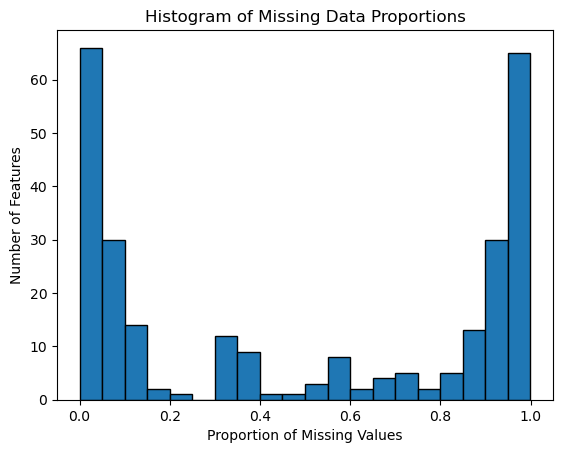

In [8]:
# we first compute the proportion of nanValues for each feature
nan_counts = np.isnan(x_train_replace).sum(axis=0)
propMissVals = nan_counts/x_train_replace.shape[0]

plt.hist(propMissVals, bins=20, edgecolor='k')
plt.title('Histogram of Missing Data Proportions')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Number of Features')
plt.show()

### Printing & plotting the Number of features retained as a function of the chosen Threshold

In [9]:
thresholds = np.arange(0, 1.05, 0.05)
for t in thresholds:
    num_features = np.sum(propMissVals <= t)
    print(f'Threshold: {t*100:.1f}%, Number of features retained: {num_features}')

Threshold: 0.0%, Number of features retained: 16
Threshold: 5.0%, Number of features retained: 66
Threshold: 10.0%, Number of features retained: 96
Threshold: 15.0%, Number of features retained: 110
Threshold: 20.0%, Number of features retained: 112
Threshold: 25.0%, Number of features retained: 113
Threshold: 30.0%, Number of features retained: 113
Threshold: 35.0%, Number of features retained: 125
Threshold: 40.0%, Number of features retained: 134
Threshold: 45.0%, Number of features retained: 135
Threshold: 50.0%, Number of features retained: 136
Threshold: 55.0%, Number of features retained: 139
Threshold: 60.0%, Number of features retained: 147
Threshold: 65.0%, Number of features retained: 149
Threshold: 70.0%, Number of features retained: 153
Threshold: 75.0%, Number of features retained: 158
Threshold: 80.0%, Number of features retained: 160
Threshold: 85.0%, Number of features retained: 165
Threshold: 90.0%, Number of features retained: 178
Threshold: 95.0%, Number of features

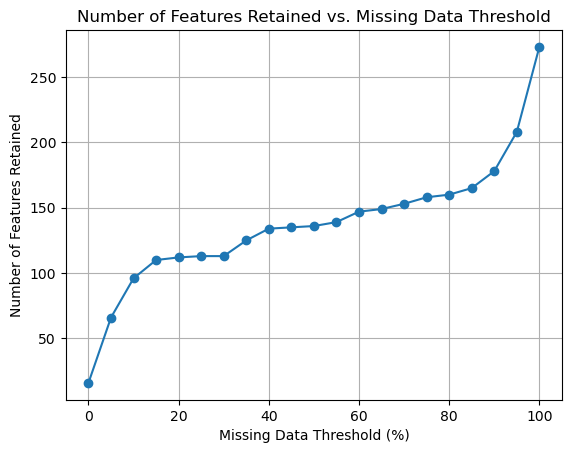

In [10]:
feature_counts = []

for t in thresholds:
    num_features = np.sum(propMissVals <= t)
    feature_counts.append(num_features)

# Plotting the results
plt.plot(thresholds * 100, feature_counts, marker='o')
plt.title('Number of Features Retained vs. Missing Data Threshold')
plt.xlabel('Missing Data Threshold (%)')
plt.ylabel('Number of Features Retained')
plt.grid(True)
plt.show()

### Choosing and applying the threshold

In [11]:
# removing columns with more than 70% of NaN values
x_train_clean = x_train_replace.copy()
x_test_clean = x_test_replace.copy()

x_train_clean, columns_to_remove_train = remove_nan(x_train_clean, 0.70)
print(f"Shape of the new training set: {x_train_clean.shape}")

x_test_clean, columns_to_remove_test = remove_nan(x_test_clean, 0.70)
print(f"Shape of the new training set: {x_test_clean.shape}")

Shape of the new training set: (328135, 153)
Shape of the new training set: (109379, 153)


## 4. Differentiating CATEGORICAL & CONTINUOUS variables

### Visualizing the number of unique values per features (with log scale), with Bar Plot

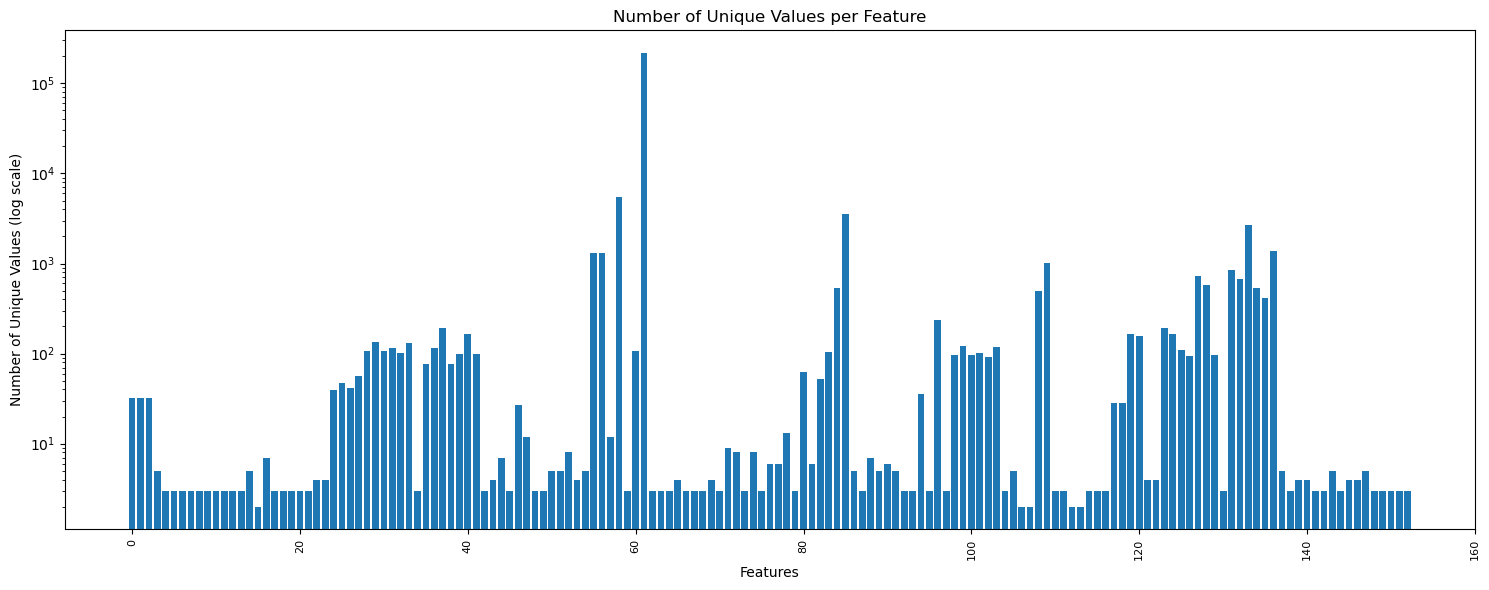

In [13]:
# Data used : x_train_clean and x_test_clean

# Calculate the number of unique values per feature
unique_counts = np.array([len(np.unique(x_train_clean[:, i])) for i in range(x_train_clean.shape[1])])

features = [i for i in range(153)]

plt.figure(figsize=(15, 6))
plt.bar(features, unique_counts)
plt.yscale('log')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Number of Unique Values (log scale)')
plt.title('Number of Unique Values per Feature')
plt.tight_layout()
plt.show()

# Display unique counts
# for idx, count in enumerate(unique_counts):
#    print(f'Feature {idx}: {count} unique values')

### Defining a threshold for differentiation

In [14]:
categorical_features, continuous_features = classify_features(x_train_clean, threshold=10)

# Display the classification results
print(f'Number of Categorical Features: {len(categorical_features)}')
print(f'Number of Continuous Features: {len(continuous_features)}')

Number of Categorical Features: 92
Number of Continuous Features: 61


## 5. Imputing values to replace missing data

### Continuous case (using the median) (is there a better way to do that?)

In [15]:
# Impute missing values in continuous features with median
x_train_impVal, x_test_impVal = impute_median_for_continuous_features(x_train_clean, x_test_clean, continuous_features)

### Categorical case (using the mode)

In [16]:
# Impute mode for categorical features in training and test data
x_train_impVal = impute_mode(x_train_impVal, categorical_features)
x_test_impVal = impute_mode(x_test_impVal, categorical_features)

### Verifying (we should have approx 1 value less per feature due to the removal of the nan value, replaced by an already existing value)

In [17]:
# Calculate the number of unique values per feature
unique_counts = np.array([len(np.unique(x_train_impVal[:, i])) for i in range(x_train_impVal.shape[1])])

# Display unique counts
for idx, count in enumerate(unique_counts):
    print(f'Feature {idx}: {count} unique values')

Feature 0: 31 unique values
Feature 1: 31 unique values
Feature 2: 31 unique values
Feature 3: 4 unique values
Feature 4: 2 unique values
Feature 5: 2 unique values
Feature 6: 2 unique values
Feature 7: 2 unique values
Feature 8: 2 unique values
Feature 9: 2 unique values
Feature 10: 2 unique values
Feature 11: 2 unique values
Feature 12: 2 unique values
Feature 13: 2 unique values
Feature 14: 4 unique values
Feature 15: 2 unique values
Feature 16: 6 unique values
Feature 17: 2 unique values
Feature 18: 2 unique values
Feature 19: 2 unique values
Feature 20: 2 unique values
Feature 21: 2 unique values
Feature 22: 3 unique values
Feature 23: 3 unique values
Feature 24: 38 unique values
Feature 25: 46 unique values
Feature 26: 41 unique values
Feature 27: 56 unique values
Feature 28: 107 unique values
Feature 29: 132 unique values
Feature 30: 106 unique values
Feature 31: 113 unique values
Feature 32: 101 unique values
Feature 33: 131 unique values
Feature 34: 2 unique values
Feature 35:

## 6. Dealing with outliers in Continuous features (by Capping)

- Lower Capping at x'th Percentile: Replace all values below the x'th percentile with the value at the x'th percentile.
- Upper Capping at y'th Percentile: Replace all values above the y'th percentile with the value at the y'th percentile.
- Here, we take a standard choice of the 1st and 99th percentiles.

In [18]:
# Apply capping with default 1st and 99th percentiles
result = cap_outliers(x_train_impVal, x_test_impVal, continuous_features)

# Extract capped data and bounds
x_train_capped = result.x_train_capped
x_test_capped = result.x_test_capped
lower_bounds = result.lower_bounds
upper_bounds = result.upper_bounds

# Verify the capping for training data
print("Verification for training data:")
verify_capping(x_train_capped, continuous_features, lower_bounds, upper_bounds)

# Verify the capping for test data
print("\nVerification for test data:")
verify_capping(x_test_capped, continuous_features, lower_bounds, upper_bounds)

Verification for training data:
Verification completed.

Verification for test data:
Verification completed.


## 9. Removing highly correlated features

Variables that are highly correlated (e.g., above 75%) might be redundant and can be removed: for each pair of highly correlated variables, we remove one of them.

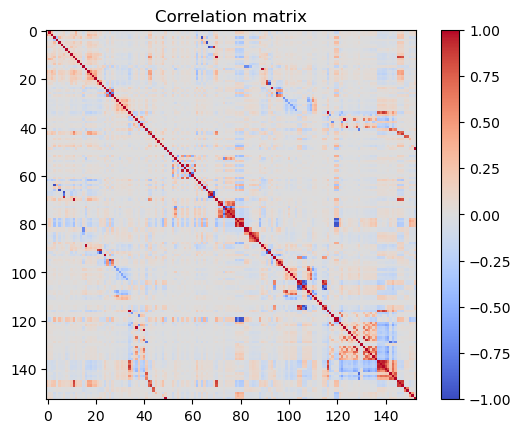

In [19]:
correlation_matrix = compute_corr(x_train_capped)
plot_corr_matrix(correlation_matrix)

In [20]:
filtered_train, kept_features = remove_correlated_features(x_train_capped, correlation_matrix, 0.75)
print(f"Shape of the new training set: {filtered_train.shape}")

filtered_test = x_test_capped[:, kept_features]
print(f"Shape of the new test set: {filtered_test.shape}")

Shape of the new training set: (328135, 104)
Shape of the new test set: (109379, 104)


## 7. Encoding Categorical features

We will use : One-Hot encoding and Label encoding

- for Binary Categorical Variables (2 categories): we use Label Encoding to map categories to 0 and 1. This avoids unnecessary feature expansion and maintains computational efficiency;
- for Nominal Categorical Variables (3-7 categories): we use One-Hot Encoding. The increase in feature count is manageable and preserves the categorical nature without introducing ordinal bias.

In [21]:
kept_features_list = list(kept_features)

# Track the kept categorical features by adjusting the indices
updated_categorical_features = [kept_features_list.index(idx) for idx in categorical_features if idx in kept_features_list]

# Now you can safely identify binary and nominal features
binary_features = [idx for idx in updated_categorical_features if len(np.unique(filtered_train[:, idx])) == 2]
nominal_features = [idx for idx in updated_categorical_features if len(np.unique(filtered_train[:, idx])) > 2]

# Encode train data
x_train_encoded = encode_categorical_features_mixed(filtered_train, binary_features, nominal_features)
print(f'Training data shape after Mixed Encoding: {x_train_encoded.shape}')

# Encode test data
x_test_encoded = encode_categorical_features_mixed(filtered_test, binary_features, nominal_features)
print(f'Test data shape after Mixed Encoding: {x_test_encoded.shape}')

Training data shape after Mixed Encoding: (328135, 171)
Test data shape after Mixed Encoding: (109379, 171)


## 8. Feature scaling : Standardizing & Normalizing continuous features

In [22]:
x_train_scaled, x_test_scaled = standardize_features(x_train_encoded, x_test_encoded, continuous_features)
print(f'Training data shape: {x_train_scaled.shape}')
print(f'Test data shape: {x_test_scaled.shape}')

Training data shape: (328135, 171)
Test data shape: (109379, 171)


## 10. Removing features with low variance (irrelevant)

In [23]:
# Let's use a threshold of 0.01
x_train_selected, x_test_selected = variance_threshold(x_train_reduced, x_train_reduced, threshold=0.01)
print(f'Training data shape after Variance Thresholding: {x_train_selected.shape}')
print(f'Test data shape after Variance Thresholding: {x_test_selected.shape}')

Training data shape after Variance Thresholding: (328135, 65)
Test data shape after Variance Thresholding: (328135, 65)


## 11. Data preparation (Adding bias term + label update for Logistic Regression)

In [24]:
def add_bias_term(x):
    bias = np.ones((x.shape[0], 1))
    return np.hstack((bias, x))

x_train_final = add_bias_term(x_train_selected)
x_test_final = add_bias_term(x_test_selected)

print(f'Training data shape after adding bias: {x_train_final.shape}')
print(f'Test data shape after adding bias: {x_test_final.shape}')

Training data shape after adding bias: (328135, 66)
Test data shape after adding bias: (328135, 66)


In [25]:
# Convert -1 labels to 0 for Logistic Regression
y_train_binary = np.where(y_train == -1, 0, y_train)